Proyecto Bootcamp Talento Tech AI Agosto 2024

# **Red Neuronal Convolucional aplicada en MNIST reconocimiento de dígitos manuscritos para la solución de CAPTCHA de Aseguramiento**

Jairo Angel Moreano

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import urllib

# Antecedentes
Para permitir el acceso a diferentes servicios solicitados por ciudadanos se requiere la consulta y certificación de estados de aseguramiento, este proceso requiere la consulta a unas páginas web que con el número de identificación del ciudadano expiden el certificado de aseguramiento respectivo, este proceso se surte previa validación de un CAPTCHA específico que presenta una imagen de 5 dígitos, a los que se le agrega ruido aleatorio. Para facilitar este proceso de consulta masivo y continuo se implementan procesos de RPA (Robotic Process Automation) que permiten a diferentes entidades procesar de forma automatizada el manejo de estas certificaciones. En el proceso de automatización se requiere resolver este CAPTCHA que consiste en la determinación de un número que se presenta en una imagen con las siguientes características:


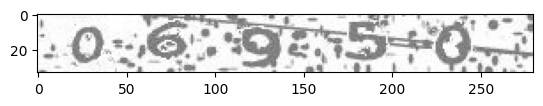

In [ ]:
url = "https://drive.google.com/file/d/1HeUMC63VKq2HBAAxRS4ymnLF6NblpdEy/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
imgBase = cv2.imdecode(arr, -1) # 'Carga de la imagen

#imgBaseInvertida = cv2.bitwise_not(imgBase)
plt.imshow(imgBase)
#plt.imshow(imgBaseInvertida)

# Solución
Se propone la construcción de un servicio de “Solución de CAPTCHA Aseguramiento” que usando una Red Neuronal Convolucional entrenada con el conjunto de datos MNIST desarrollado en Python usando la estrucutra general de Red Neuronal Convolucional presentada por el profesor Anfres Felipe Escallon en el material Talento Tech Bootcamp Inteligencia Artificial (2024). Este servicio se desplegara con flask.palletsprojects para que  reciba una imagen y determine el número que se presenta en esta imagen.

# Funcionamiento general de la solución:
I.	Se inicia con la carga de  la imagen y ejecución de procesos de filtrado general para limpiar la imagen y hacer una mejor aproximación de los ejes que definen la información dentro de la imagen con el uso de la librería OpenCV https://pypi.org/project/opencv-python/.

II.	Fraccionamiento de imagen en cada uno de los  dígitos usando OpenCV.

III.	Entrega del fraccionamiento de la imagen a un servicio que utiliza una  Red Neuronal Convolucional entrenada con MNIST (reconocimiento de dígitos manuscritos) construida con la librería keras https://keras.io/ y que identificara la información que está presente en la imagen que ingresa.

IV. Predicción



**# Desarrollo de la solución**


# I Carga de la imagen

1 lectura de la imagen y procesamiento previo

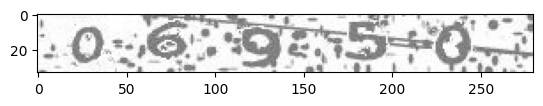

In [ ]:
url = "https://drive.google.com/file/d/1HeUMC63VKq2HBAAxRS4ymnLF6NblpdEy/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
imgBase = cv2.imdecode(arr, -1) # 'Carga de la imagen
plt.imshow(imgBase)
imgTrabajo = imgBase

Inversion de la imagen

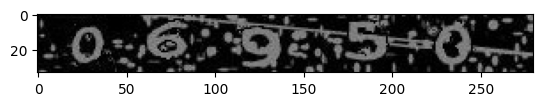

In [ ]:
imgTrabajo = cv2.bitwise_not(imgTrabajo)
plt.imshow(imgTrabajo)

2 Procesmaiento previo

    Eliminacion de ruido

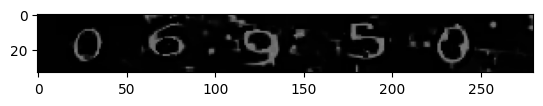

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgBase = cv2.erode(imgTrabajo, kernel)
plt.imshow(imgBase)
imgTrabajoSinRuido = cv2.fastNlMeansDenoising(imgBase, None, 12, 9, 25)
plt.imshow(imgTrabajoSinRuido)
imgTrabajo = imgTrabajoSinRuido


  3 Aplicacion de filtro para determinacion de ejes

  Se propuso en el proceso la aplicación de un filtro 2D o usar suavización para fijar mejor los ejes y eliminar ruido pero se desechó por perdida de características en la imagen.

In [ ]:
#kernel = np.array(
#    [
#        [1, 1],
#        [1, 1]
#    ]
#)

##Aplicar filtro de afilado
#imgBaseFiltrado = cv2.filter2D(imgTrabajo, -1, kernel)
##blur = cv2.GaussianBlur(imgBaseFiltrado, (5,5), 0)  // no se aplica filtro Gausiano
#plt.imshow(imgBaseFiltrado)
#imgTrabajo =  imgBaseFiltrado


# II. Fraccionamiento la imagen en cada uno de los dígitos.
Para la determinacion de imagnes individuales se exploro el uso de la funcion cv2.findContours
https://medium.com/analytics-vidhya/opencv-findcontours-detailed-guide-692ee19eeb18 pero dado que en el problema propuesto los numeros aparecen consistentemente en la misma posicion, entonces se fracciono la imagen de forma deterministica y se deja este metodo de exploracion para otro caso de uso, al igual que lo sugerido por el tutor Jonnatan con la implementacion de YOLO (https://towardsdatascience.com/yolo-you-only-look-once-real-time-object-detection-explained-492dc9230006).

Para efecto de este ejemplo se parten la imagnes con split dado que la fuente presente uniformidad en la disposicion de los caracteres

33
280
3


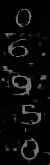

In [ ]:
from google.colab.patches import cv2_imshow # Import the cv2_imshow function
height, width, channels = imgTrabajo.shape
print (height)
print (width)
print (channels)
imgTrabajoTem = imgTrabajo
inicio = 5
pading = 3
part_image_width = 53;
slice_width = part_image_width - pading;
imgTrabajo01 = imgTrabajoTem[: , inicio : (inicio + slice_width)]
imgTrabajo02 = imgTrabajoTem[: , inicio + slice_width:inicio + 2 * slice_width]
imgTrabajo03 = imgTrabajoTem[: , inicio + 2 * slice_width:inicio + 3 * slice_width]
imgTrabajo04 = imgTrabajoTem[: , inicio + 3 * slice_width:inicio + 4 * slice_width]
imgTrabajo05 = imgTrabajoTem[: , inicio + 4 * slice_width:inicio + 5 * slice_width]

vertical_concat = np.vstack((imgTrabajo01, imgTrabajo02, imgTrabajo03, imgTrabajo04, imgTrabajo05))
cv2_imshow(vertical_concat)

cv2.waitKey(0)
cv2.destroyAllWindows()

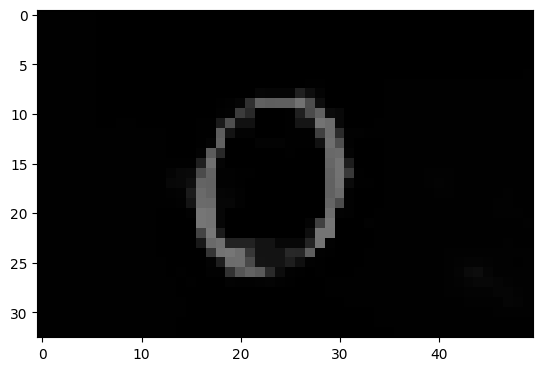

In [ ]:
plt.imshow(imgTrabajo01)
cv2.waitKey(0)
cv2.destroyAllWindows()

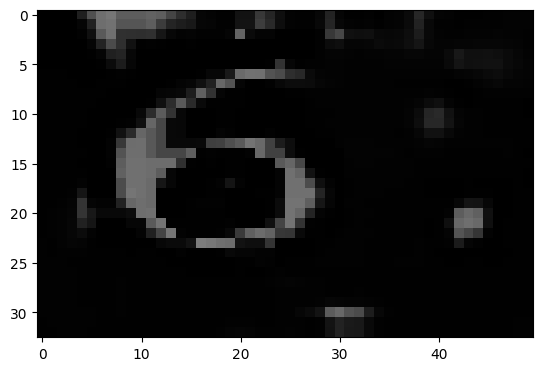

In [ ]:
plt.imshow(imgTrabajo02)
cv2.waitKey(0)
cv2.destroyAllWindows()

Se prepara la imagen para la prediccion trasformandola a una imagen  28 X 28 que corresponda al dataset de entrenamiento como alternativa se uso resize con interpolacion pero "engroso" la imagen y la prediccion no fue la correcta

imgTrabajo = cv2.resize(imgTrabajo, (28, 28),
interpolation = cv2.INTER_LINEAR)



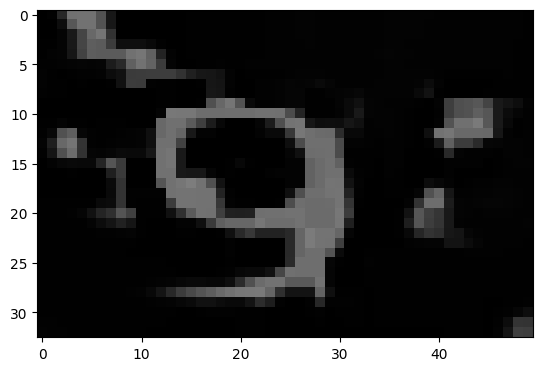

In [ ]:
plt.imshow(imgTrabajo03)
cv2.waitKey(0)
cv2.destroyAllWindows()

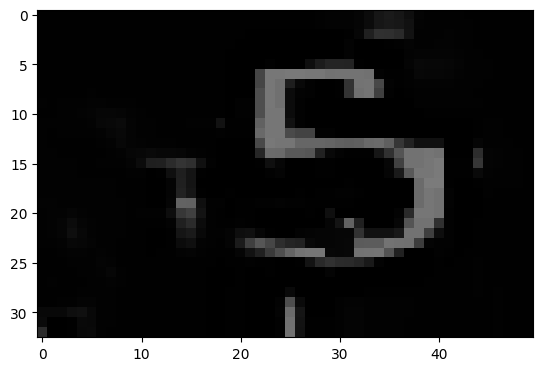

In [ ]:
plt.imshow(imgTrabajo04)
cv2.waitKey(0)
cv2.destroyAllWindows()

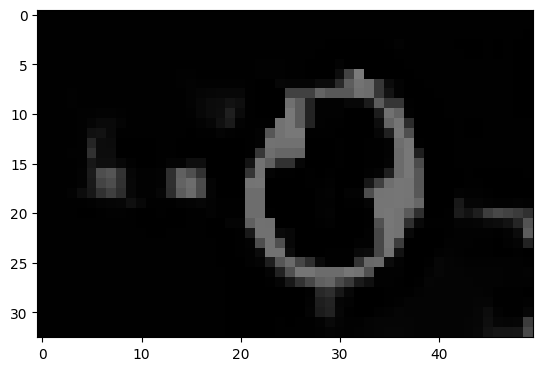

In [ ]:
plt.imshow(imgTrabajo05)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
imgTrabajo01 = cv2.resize(imgTrabajo01, (28, 28))
imgTrabajo02 = cv2.resize(imgTrabajo02, (28, 28))
imgTrabajo03 = cv2.resize(imgTrabajo03, (28, 28))
imgTrabajo04 = cv2.resize(imgTrabajo04, (28, 28))
imgTrabajo05 = cv2.resize(imgTrabajo05, (28, 28))


imgTrabajo = cv2.resize(imgTrabajo, (28, 28))

#Codigo para visualizar la estrucutura y datos de la imagen
for i in range(0, 28):
  print (imgTrabajo01 [i])


[[1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0

Imagen final para el proceso de prediccion con tamaño de 28 x 28 compatible con la red propuesta y el conjunto de entrenamiento

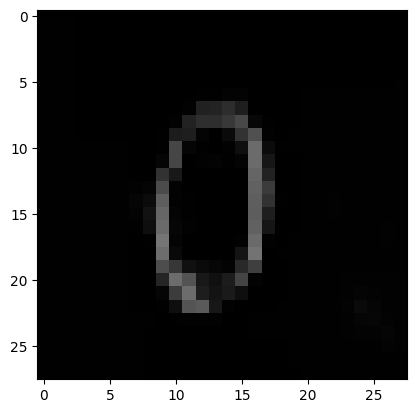

In [ ]:
plt.imshow(imgTrabajo01)
cv2.waitKey(0)
cv2.destroyAllWindows()

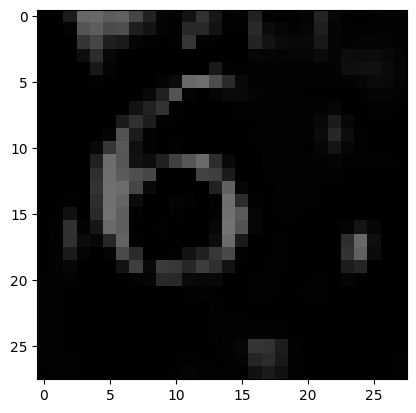

In [ ]:
plt.imshow(imgTrabajo02)
cv2.waitKey(0)
cv2.destroyAllWindows()

# III.	Entrenar una Red Neuronal Convolucional con el conjunto de datos MNIST (reconocimiento de dígitos manuscritos)



Cargar el conjunto de datos de entrenamiento y de prueba

In [ ]:
#Cargar el conjunto de datos
mnist = keras.datasets.mnist
#Cargar divison de entrenamiento y pruebas
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Visualizar algun dato  del conjunto de entrenamiento

Label:  0
Image:
   [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 25

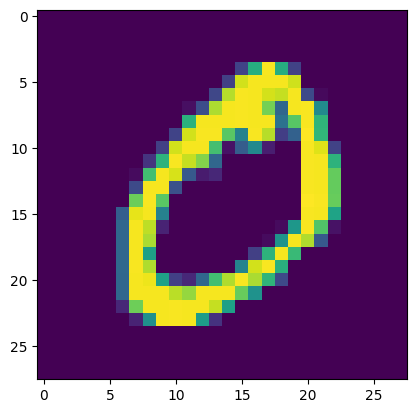

In [ ]:
# Poner aqui entre 0 y 59999
index = 1
#  imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print (f'Label:  {training_labels[index]}')
print (f'Image:\n   {training_images[index]}')
# Visualiza la imagen
plt.imshow(training_images[index])
print (type(training_images[index]))

Visualizar algun dato  del conjunto de prueba

Label:  0
Image:
   [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 25

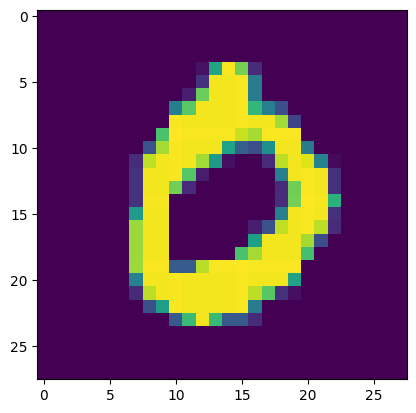

In [ ]:
# Poner aqui entre 0 y 59999
index = 3
#  imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print (f'Label:  {test_labels[index]}')
print (f'Image:\n   {test_images[index]}')
# Visualiza la imagen
plt.imshow(test_images[index])
print (type(test_images[index]))

Normalizacion de datos

In [ ]:
training_images = training_images /255.0
test_images = test_images /255.0


Construccion del modelo

In [ ]:
#Construccion del modelo
model = keras.models.Sequential([
 # Agregar convoluciones y max poloing
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
 # Agregar las mismas capas que antes
 keras.layers.Flatten(),
 keras.layers.Dense(128, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Compilar el modelo

In [ ]:
#Compilar el modelo
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


Entrenamiento del modelo

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.9073 - loss: 0.3146
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9848 - loss: 0.0510
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 26ms/step - accuracy: 0.9903 - loss: 0.0329
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.9942 - loss: 0.0193
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9959 - loss: 0.0150
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - accuracy: 0.9975 - loss: 0.0083
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9977 - loss: 0.0071
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9982 - loss: 0.0053
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9991 - loss: 0.0034
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9991 - loss: 0.0034


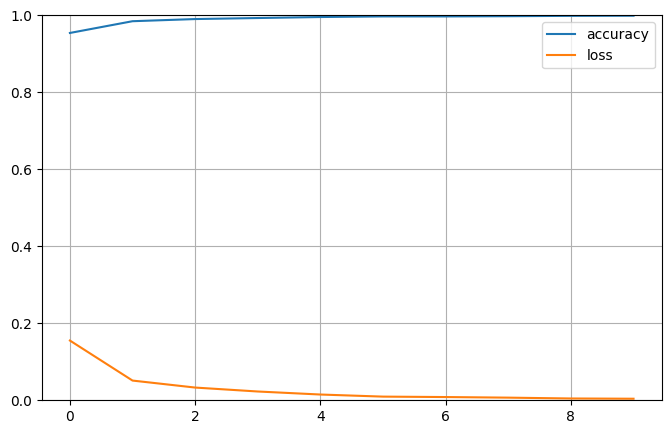

In [ ]:
#Entrenar el modelo
history = model.fit(training_images, training_labels, epochs= 10)

#Graficar el historial de entrenamieto
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


Evaluacion del modelo

In [ ]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)

print("Perdida del conjunto de entrenamiento",loss)
print("Precision en el conjunto de entrenamiento",accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)

print("Perdida del conjunto de prueba",loss)
print("Precision en el conjunto de prueba",accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9998 - loss: 0.0011
Perdida del conjunto de entrenamiento 0.001233949325978756
Precision en el conjunto de entrenamiento 0.9997166395187378
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9832 - loss: 0.0666
Perdida del conjunto de prueba 0.05130339786410332
Precision en el conjunto de prueba 0.9876000285148621


observa como quedaron los elementos

Label:  0
Image:
   [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0

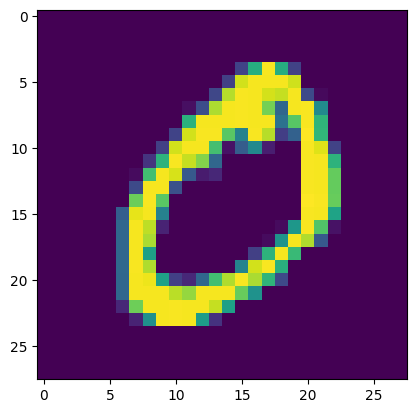

In [ ]:
# Poner aqui entre 0 y 59999
index = 1
#  imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print (f'Label:  {training_labels[index]}')
print (f'Image:\n   {training_images[index]}')
# Visualiza la imagen
plt.imshow(training_images[index])
print (type(training_images[index]))

Prediccion del modelo con datos prueba

In [ ]:
#Prediccion
# Poner aqui entre 0 y 59999
index = 3
print(f'Label: {test_labels[index]}')
clasificacion = model.predict(test_images[index:index+1])
print(f'Prediccion: \n {clasificacion.reshape(-1,1)}')
print(f"This digit is probablemente a {np.argmax(clasificacion)}")
print(test_images[index:index+1].shape)
print (model.input_shape)


# Poner aqui entre 0 y 59999
#  imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print (f'Label:  {test_labels[index]}')
print (f'Image:\n   {test_images[index:index+1]}')
# Visualiza la imagen
#plt.imshow(test_images[index:index+1])
print (type(test_images[index:index+1]))


Label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediccion: 
 [[1.0000000e+00]
 [7.2557168e-13]
 [2.6360015e-11]
 [9.4722125e-13]
 [1.9922247e-13]
 [8.1273372e-16]
 [5.0809512e-10]
 [8.4663084e-12]
 [3.9769098e-14]
 [3.0839957e-12]]
This digit is probablemente a 0
(1, 28, 28)
(None, 28, 28, 1)
Label:  0
Image:
   [[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.  

In [ ]:
FIRST_IMAGE = 3
SECOND_IMAGE = 10
THIRD_IMAGE = 25

#Para 7
#FIRST_IMAGE = 2
#SECOND_IMAGE = 5
#THIRD_IMAGE = 14

print (test_labels[FIRST_IMAGE])
print (test_labels[SECOND_IMAGE])
print (test_labels[THIRD_IMAGE])


0
0
0


Visualizacion de Imagenes

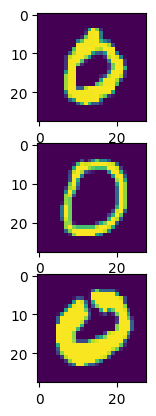

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

# Creacion del servicio
Aceptando el nivel de acierto generado por el modelo se procede a la creacion del servicio con:


model.save('CAPTCHA_Aseguramiento_V20240828.h5')

cuando se carga el serivio se procede con:

new_model = keras.models.load_model('CAPTCHA_Aseguramiento_V20240828.h5')

y para la prediccion:
predictions = new_model.predict(test_images)


chatGPT script "how i can save keras.model training for futre predicctions"

# IV. Prediccion
Se toma la imagen seleccionada y se preprocesa para tenerla en la estructura np para ejecutar predicion

Imagen inicial


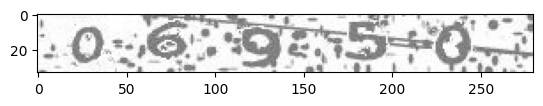

In [ ]:
url = "https://drive.google.com/file/d/1HeUMC63VKq2HBAAxRS4ymnLF6NblpdEy/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
imgBase = cv2.imdecode(arr, -1) # 'Carga de la imagen

plt.imshow(imgBase)

Predicción

In [ ]:
#Genera una arry np con la imagen a procesar (predecir)
def generacion_imagen_para_prediccion(arrBase, _imgTrabajo):
  arrNew = arrBase.copy()
  for i in range(0+pading, 28-pading):
    for j in range(0+pading, 28-pading):
      arrNew [0][i][j] = _imgTrabajo[i][j][0]
  arrNew = arrNew/255
  return arrNew

#Generar un array np base
index = 1
arrBase = test_images[index:index+1].copy()
arrBase = arrBase*0

#Primer digito
arr = generacion_imagen_para_prediccion(arrBase, imgTrabajo01)
clasificacion = model.predict(arr)  # Use the reshaped array for prediction
mejores_respuestas = np.argmax(clasificacion, axis=1).reshape(-1, 1)
print("Valor más probable primer dígito", mejores_respuestas)
print(f'Prediccion: \n {clasificacion.reshape(-1,1)}')

#segundo digito
arr = generacion_imagen_para_prediccion(arrBase, imgTrabajo02)
clasificacion = model.predict(arr)  # Use the reshaped array for prediction
mejores_respuestas = np.argmax(clasificacion, axis=1).reshape(-1, 1)
print("Valor más probable segundo dígito", mejores_respuestas)
print(f'Prediccion: \n {clasificacion.reshape(-1,1)}')

#tercer digito
arr = generacion_imagen_para_prediccion(arrBase, imgTrabajo03)
clasificacion = model.predict(arr)  # Use the reshaped array for prediction
mejores_respuestas = np.argmax(clasificacion, axis=1).reshape(-1, 1)
print("Valor más probable tercer dígito", mejores_respuestas)
print(f'Prediccion: \n {clasificacion.reshape(-1,1)}')

#cuarto digito
arr = generacion_imagen_para_prediccion(arrBase, imgTrabajo04)
clasificacion = model.predict(arr)  # Use the reshaped array for prediction
mejores_respuestas = np.argmax(clasificacion, axis=1).reshape(-1, 1)
print("Valor más probable cuarto dígito", mejores_respuestas)
print(f'Prediccion: \n {clasificacion.reshape(-1,1)}')

#quinto digito
arr = generacion_imagen_para_prediccion(arrBase, imgTrabajo05)
clasificacion = model.predict(arr)  # Use the reshaped array for prediction
mejores_respuestas = np.argmax(clasificacion, axis=1).reshape(-1, 1)
print("Valor más probable quinto dígito", mejores_respuestas)
print(f'Prediccion: \n {clasificacion.reshape(-1,1)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Valor más probable primer dígito [[0]]
Prediccion: 
 [[0.86733925]
 [0.02106773]
 [0.01972321]
 [0.00733297]
 [0.00665141]
 [0.00970663]
 [0.02230489]
 [0.01677833]
 [0.01184275]
 [0.0172529 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Valor más probable segundo dígito [[7]]
Prediccion: 
 [[0.05181491]
 [0.17206696]
 [0.05712978]
 [0.02203713]
 [0.00969023]
 [0.04548636]
 [0.00248728]
 [0.5015852 ]
 [0.00653   ]
 [0.13117221]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Valor más probable tercer dígito [[5]]
Prediccion: 
 [[1.6190277e-02]
 [6.4814448e-02]
 [1.1363515e-02]
 [5.4631017e-02]
 [4.6385490e-04]
 [7.6877147e-01]
 [3.4648913e-04]
 [5.8618866e-02]
 [1.9202193e-03]
 [2.2879921e-02]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Valor más probable cuarto dígito [[5]]
Prediccion: 
 [[4.8300367e-02]
 [1.1817694e-03]
 [5.4171514e-03]
 [1.8450864e-02]
 [2.3605338e-04]
 [8.3955950e-01]
 [3.9086933e-03]
 [3.8485866e-02]
 [1.0929877e-02]
 [3.3529896e-02]]
1/1 ━━━━━━━

# V. Conclusiones

1. En el desarrollo de estos prototipos mínimos de implementación de una teoría es importante tener una visualización gráfica y de la estructura de datos que se esta trabajando para poder tener foco en la solución, lo que el modelo demanda con exactitud y como el modelo trasforma ese insumo en un resultado que se debe analizar.

2. En los primeras ejecuciones se encontro que imagenes con la informacion no proporcioanl al conjunto de prueba no son reconocidas (por ejemplo el cero en las primeras corridas consistentemente lo predecia como un 4 o un 6 ) entonces se concluye que para este ambito de problema,  las imagnes ingresadas debe tener una correspondencia en tamaño y caracteristicas a las imagenes del entrenamiento

3. Dado los ejemplos analizados y el acirto encontrado sigue entrenar una red con arquitectura similar usando digitos manuscritos corruptos ver:

  https://www.tensorflow.org/datasets/catalog/mnist_corrupted?hl=es

  https://www.kaggle.com/code/sudh4444/mnist-data-using-numpy  

  https://www.kaggle.com/code/sudh4444/mnist-data-using-numpy

  https://zenodo.org/records/3239543

4. Se puede dar a funcionamiento el servicio  propuesto y con cada acierto (el bot que ejecuta el procesomiento de los certificados conoce con exactitud si se logro el acceso o no ) se puede construir de manera muy rapida  una base de datos de este tipo de imagenes y proceder con la misma arquitectura de la red neuronal a un entrenamiento con los tipos especificos de del problema.

# VI Bibliografia

Escallón, Andres F (2024), Material Talento Tech Bootcamp Inteligencia Artificial Intermedio


Pyton.org 2024  https://www.python.org/


Open Computer Vision (2024)  Library https://opencv.org/

Keras	(2024) https://keras.io/

Medium Shaikh Raqueeb (2020) OpenCV (findContours) Detailed Guide https://medium.com/analytics-vidhya/opencv-findcontours-detailed-guide-692ee19eeb18

Yalo: Real-Time Object Detection (2024) https://pjreddie.com/darknet/yolo/

TensorFlow Datasets mnist_corrupted (2024) https://www.tensorflow.org/datasets/catalog/mnist_corrupted?hl=es


OpenAI. (2024). ChatGPT (versión 2024) [Modelo de lenguaje de gran tamaño]. https://chat.openai.com/chat
Se pregunto  "how i can save keras.model training for futre predicctions" respondio:  
model.save('file_name.h5')

